In [157]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-and-stem-salaries/Levels_Fyi_Salary_Data.csv


In [158]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
file = '../input/data-science-and-stem-salaries/Levels_Fyi_Salary_Data.csv'
df = pd.read_csv(file, usecols=['company', 'title', 'totalyearlycompensation', 'location', 'yearsofexperience'])
df.head(10)
df = df.drop_duplicates() 
df.isna().sum()
# df.shape
df = df.dropna()
df.head()

# correlation = pd.DataFrame(df[numerical].corrwith(df['totalyearlycompensation']), columns = ['values'])
# correlation

,company,title,totalyearlycompensation,location,yearsofexperience
0,Oracle,Product Manager,127000,"Redwood City, CA",1.5
1,eBay,Software Engineer,100000,"San Francisco, CA",5.0
2,Amazon,Product Manager,310000,"Seattle, WA",8.0
3,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",7.0
4,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0


In [159]:
# Frequency Counts of the column “company”
#df['company'].value_counts()
df.company.nunique()
def faang_classifier(company):
    top_company = ['Facebook', 'Amazon', 'Apple', 'Netflix', 'Google', 'Microsoft']
    if company in top_company:
        return 1 
    else:
        return 0

df['is_topcompany'] = df['company'].apply(lambda x: faang_classifier(x))
df['is_topcompany'] = df['is_topcompany'].fillna(0)
del df['company']
df.head()

,title,totalyearlycompensation,location,yearsofexperience,is_topcompany
0,Product Manager,127000,"Redwood City, CA",1.5,0
1,Software Engineer,100000,"San Francisco, CA",5.0,0
2,Product Manager,310000,"Seattle, WA",8.0,1
3,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,1
4,Software Engineer,157000,"Mountain View, CA",5.0,1


In [160]:
# plt.figure(figsize=(12,8))
# sns.histplot(x='totalyearlycompensation', df = df)
# There is a very long tail for total yearly compensation, therefore let's use np.log1p to shorten the tail.
#df['totalyearlycompensation'] = np.log1p(df['totalyearlycompensation'])
df.head()
# plt.figure(figsize=(12,8))
# sns.histplot(x='totalyearlycompensation', data = df)

,title,totalyearlycompensation,location,yearsofexperience,is_topcompany
0,Product Manager,127000,"Redwood City, CA",1.5,0
1,Software Engineer,100000,"San Francisco, CA",5.0,0
2,Product Manager,310000,"Seattle, WA",8.0,1
3,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,1
4,Software Engineer,157000,"Mountain View, CA",5.0,1


In [162]:
# df['title'] = df['title'].cat.codes
# df['location'] = df['location'].cat.codes

# Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoded_columns = ['location', 'title']
le = LabelEncoder()

for column in label_encoded_columns:
    df[column] = le.fit_transform(df[column])


In [163]:
df.head()

,title,totalyearlycompensation,location,yearsofexperience,is_topcompany
0,8,127000,767,1.5,0
1,11,100000,822,5.0,0
2,8,310000,858,8.0,1
3,12,372000,908,7.0,1
4,11,157000,609,5.0,1


Epoch 1/100
1141/1141 [==============================] - 2s 2ms/step - loss: 123914.3125 - val_loss: 101233.4141
Epoch 2/100
1141/1141 [==============================] - 2s 2ms/step - loss: 97150.2109 - val_loss: 93470.1562
Epoch 3/100
1141/1141 [==============================] - 2s 2ms/step - loss: 88016.0312 - val_loss: 84822.2188
Epoch 4/100
1141/1141 [==============================] - 2s 2ms/step - loss: 82727.9062 - val_loss: 82975.1250
Epoch 5/100
1141/1141 [==============================] - 2s 2ms/step - loss: 82074.8906 - val_loss: 82884.2969
Epoch 6/100
1141/1141 [==============================] - 2s 2ms/step - loss: 82024.5234 - val_loss: 82837.9688
Epoch 7/100
1141/1141 [==============================] - 2s 2ms/step - loss: 81951.3828 - val_loss: 82774.8750
Epoch 8/100
1141/1141 [==============================] - 2s 2ms/step - loss: 81960.1562 - val_loss: 82910.5078
Epoch 9/100
1141/1141 [==============================] - 2s 2ms/step - loss: 81941.6484 - val_loss: 82728.4609

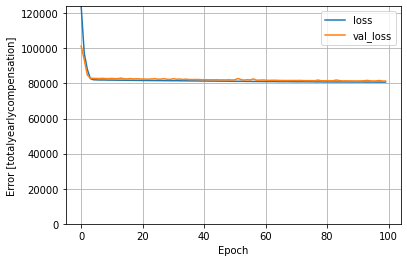

In [169]:
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

def keras_regression():
  model = tf.keras.Sequential([
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model


# How much you would get if I join for a position based on number of experiences and location?
train_features = train_dataset[['title', 'location', 'yearsofexperience']]
test_features = test_dataset[['title', 'location', 'yearsofexperience']]
train_labels = train_dataset[['totalyearlycompensation']]
test_labels = test_dataset[['totalyearlycompensation']]

model = keras_regression()
hist = model.fit(np.array(train_features), np.array(train_labels), epochs=100, validation_split = 0.2)
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.ylim([0, max(hist.history['loss'])])
plt.xlabel('Epoch')
plt.ylabel('Error [totalyearlycompensation]')
plt.legend()
plt.grid(True)

In [182]:
model.evaluate(test_features,test_labels)

357/357 [==============================] - 1s 1ms/step - loss: 82004.8828


82004.8828125

In [187]:
predict1 = model.predict(test_features).flatten()
predict1.shape
predict1=predict1.reshape(11404,1)

In [188]:
def rmse(y_predict, y_test):
    return np.sqrt(np.square(np.subtract(y_test,y_predict)).mean())
rmse(predict1, test_labels)

totalyearlycompensation    132872.937891
dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


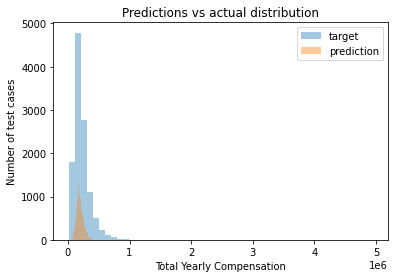

In [190]:
sns.distplot(test_labels, label='target', kde=False)
sns.distplot(predict1, label='prediction', kde=False)

plt.legend()

plt.ylabel('Number of test cases')
plt.xlabel('Total Yearly Compensation')
plt.title('Predictions vs actual distribution')

plt.show()

In [180]:
def keras_prediction(model, x):
    print(model.predict(x))
    
title = 8.0
location = 767.0
yearExp = input("Please enter how many years of experience you have:")
yearEx = float(yearExp)

print(np.array([[title, location, yearEx]]))
print( "If you join based on "+ yearExp +  " years of experience, you will get: ")
ans = keras_prediction(model, np.array([[title, location, yearEx]]))

Please enter how many years of experience you have: 2


[[  8. 767.   2.]]
If you join based on 2 years of experience, you will get: 
[[158552.03]]


In [191]:
#How much you would get if you accept an offer for a position from X company based on number of experiences and location?
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('totalyearlycompensation')
test_labels = test_features.pop('totalyearlycompensation')

def keras_regression():
  model = tf.keras.Sequential([
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  model.fit(np.array(train_features), np.array(train_labels), epochs=100, validation_split = 0.2)
  return model

model = keras_regression()

def keras_prediction(model, x):
    print(model.predict(x))
    
title = 8.0
location = 767.0
years = 1.5
yearsatcompany = 1
is_topcompany = 1

print(np.array([[title, location, years, is_topcompany]]))
keras_prediction(model, np.array([[title, location, years, is_topcompany]]))

# How much you will be getting for a position after Y years joining to X company?
keras_prediction(model, np.array([[title, location, years + yearsatcompany, is_topcompany]]))

Epoch 1/100
1141/1141 [==============================] - 2s 2ms/step - loss: 130345.6016 - val_loss: 102154.2422
Epoch 2/100
1141/1141 [==============================] - 2s 2ms/step - loss: 98995.9844 - val_loss: 96380.4844
Epoch 3/100
1141/1141 [==============================] - 2s 2ms/step - loss: 91622.0156 - val_loss: 88161.5938
Epoch 4/100
1141/1141 [==============================] - 2s 2ms/step - loss: 83985.0547 - val_loss: 82710.6172
Epoch 5/100
1141/1141 [==============================] - 2s 2ms/step - loss: 81436.7422 - val_loss: 81895.5625
Epoch 6/100
1141/1141 [==============================] - 2s 2ms/step - loss: 80995.0234 - val_loss: 81667.3594
Epoch 7/100
1141/1141 [==============================] - 2s 2ms/step - loss: 80809.7812 - val_loss: 81485.1953
Epoch 8/100
1141/1141 [==============================] - 2s 2ms/step - loss: 80662.5078 - val_loss: 81338.2578
Epoch 9/100
1141/1141 [==============================] - 2s 2ms/step - loss: 80510.4844 - val_loss: 81161.3125

767.0